# 얼굴과 미소 인식 + text + image

In [1]:
import numpy as np
import cv2

faceCascade = cv2.CascadeClassifier("haarcascades\haarcascade_frontalface_default.xml")
smileCascade = cv2.CascadeClassifier('haarcascades\haarcascade_smile.xml')
cigar_ori = cv2.imread('Image\melon.png',-1)
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height

def transparentOverlay(src, overlay, pos=(0, 0), scale=0.5):
    overlay = cv2.resize(overlay, (0, 0), fx=scale, fy=scale)
    h, w, _ = overlay.shape  # Size of foreground
    rows, cols, _ = src.shape  # Size of background Image
    y, x = pos[0], pos[1]  # Position of foreground/overlay image

    # loop over all pixels and apply the blending equation
    for i in range(h):
        for j in range(w):
            if x + i >= rows or y + j >= cols:
                continue
            alpha = float(overlay[i][j][3] / 255.0)  # read the alpha channel
            src[x + i][y + j] = alpha * overlay[i][j][:3] + (1 - alpha) * src[x + i][y + j]
    return src

while True:
    ret, img = cap.read()
    img = cv2.flip(img, 1) # 상하반전
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(20, 20)
    )
    
    cv2.putText(img, "Smile at the camera :)", (150, 460), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        smile = smileCascade.detectMultiScale(
            roi_gray,
            scaleFactor= 1.5,
            minNeighbors=15,
            minSize=(25, 25),
            )
        
        for (xx, yy, ww, hh) in smile:
            if h > 0 and w > 0:

                cigar_symin = int(y + 2.5 * h / 6)
                cigar_symax = int(y + 5.5 * h / 5)
                sh_cigar = cigar_symax - cigar_symin

                face_cigar_roi_color = img[cigar_symin:cigar_symax, x:x+w]

                cigar= cv2.resize(cigar_ori, (w, sh_cigar),interpolation=cv2.INTER_CUBIC)

                transparentOverlay(face_cigar_roi_color,cigar,(int(w/2.5),int(sh_cigar/1.6)))
                
                cv2.putText(img, "Smile", (275, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
        cv2.imshow('video',img) # video라는 이름으로 출력
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit # ESC를 누르면 종료
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
from PIL import Image
before = Image.open("Image\s1.png")
after = Image.open("Image\s2.png")

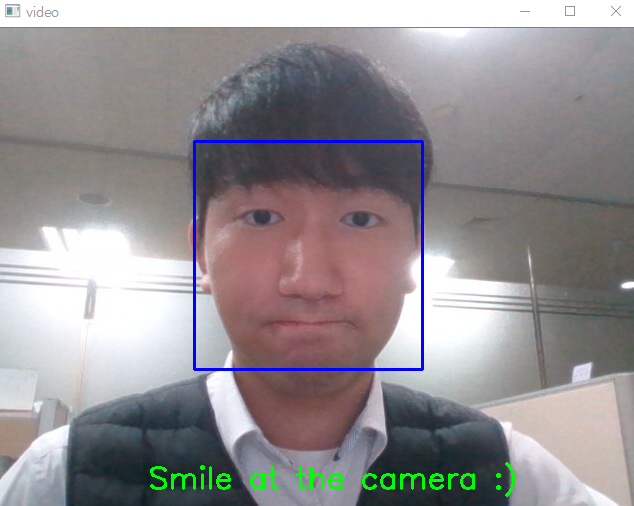

In [4]:
before

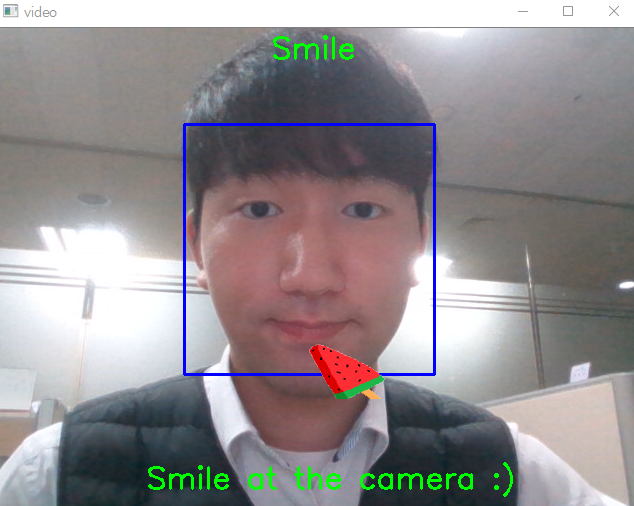

In [5]:
after